In [11]:
import pandas as pd
import numpy as np

In [31]:
data=pd.read_csv(r"C:\Users\dell\Downloads\Company_Data.csv")

In [32]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [33]:
import matplotlib.pyplot as plt

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <a list of 10 Patch objects>)

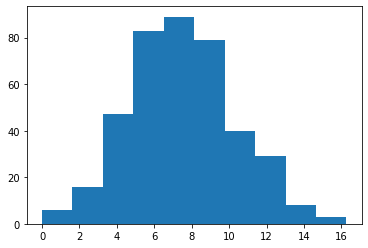

In [34]:
plt.hist(data['Sales'])

In [35]:
np.mean(data['Sales'])

7.496325

In [36]:
np.median(data['Sales'])

7.49

In [37]:
data.loc[data['Sales']<=7.49,'Sales']=0

In [38]:
data.loc[data['Sales']>7.49,'Sales']=1

In [39]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,Good,33,14,Yes,Yes
396,0.0,139,23,3,37,120,Medium,55,11,No,Yes
397,0.0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0.0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [40]:
a=pd.get_dummies(data['ShelveLoc'])

In [41]:
b=pd.get_dummies(data['Urban'])

In [42]:
c=pd.get_dummies(data['US'])

In [50]:
q=pd.concat([data.drop('ShelveLoc',axis=1),a],axis=1)

In [51]:
w=pd.concat([q.drop('Urban',axis=1),b],axis=1)

In [52]:
e=pd.concat([w.drop('US',axis=1),c],axis=1)

In [53]:
e

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Bad,Good,Medium,No,Yes,No,Yes
0,1.0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,1.0,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,1.0,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,0.0,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,0.0,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,0.0,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,0.0,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,0.0,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [54]:
x=e.drop('Sales',axis=1)

In [55]:
y=e["Sales"]

In [57]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [61]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=x.columns)

In [68]:
y_pred = dt.predict(X_test)

In [70]:
species = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(species, predictions)

array([[40, 11],
       [10, 39]], dtype=int64)

In [72]:
accuracy=(40+39)/100

In [73]:
accuracy

0.79